# Practical Exam - Pet Box Subscription

## Company Background
PetMind is a nationwide pet product retailer in the United States. With inflation hitting 41-year highs, the company is planning to reduce the cost of customer retention by improving brand loyalty. The first strategy is to launch a monthly pet box subscription in three months.

The marketing team is preparing a list of popular products for the pet box subscription. The chief marketing officer wants to know whether the list should only include the products being purchased more than once.

## Customer Questions
The marketing team would like to answer the following questions to help with the decision:
* How many products are being purchased more than once?
* Do the products being purchased again have better sales than others?
* What products are more likely to be purchased again for different types of pets?

## Dataset Description
The dataset needs to be validated based on the description below:
***Product ID*** - Character, the unique identifier of the product.

***Product Category*** - Character, the category of the product, one of 11 categories.

***Sales*** - Numeric, the sales of the product in dollars last year. For example, “$120,000” should be converted into 120000.

***Price*** - Numeric, the price of the product in dollars.

***Vendor ID*** - Character, the unique identifier of the vendor for the product.

***Pet Size*** - Character, the pet size category the product is designed for, one of 5 size categories.

***Pet Type*** - Character, the pet type the product is designed for, one of “cat” ,“dog”, “fish”, “bird”. Rows that indicate other pet types should not be included in the analysis.

***Rating*** - Numeric, customer’s rating of the product (should be on a 10 point scale)

***Rebuy*** - Binary, whether the product is purchased more than once or not (should be 1 or 0)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize":(12, 6)}) 

In [2]:
# Upload the data
pet_sales = pd.read_csv('pet_sales.csv')

In [3]:
pet_sales

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0
...,...,...,...,...,...,...,...,...,...
874,4999,Snack,"$27,000",146.93,VC_1564,medium,bird,6,0
875,4243,Snack,"$76,000",174.07,VC_808,medium,hamster,8,0
876,4783,Snack,"$162,000",224.12,VC_1348,medium,cat,7,1
877,4664,Bedding,"$34,000",199.15,VC_1229,large,dog,10,1


# Data Validation - EDA

In [4]:
# dataset info

pet_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


## Checking the data for accordance to the data description

In [5]:
# Sales column should be converted from object to numeric type

pet_sales.sales = pd.to_numeric(pet_sales.sales.apply(lambda x: x.replace('$', '').replace(',', '')))
pet_sales.sales.head(3)

0    123000
1     61000
2    218000
Name: sales, dtype: int64

In [6]:
# Rows that indicate other than “cat” ,“dog”, “fish” or “bird” pet type should be excluded in the analysis

pet_sales.drop(pet_sales.query("pet_type not in ['cat', 'dog', 'fish', 'bird']").index, inplace=True)

pet_sales.shape

# 833 rows left

(833, 9)

In [7]:
# Rating column should be on a 10 point scale

# pet_sales.rating.describe()
np.sort(pet_sales.rating.unique())

# That's true

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [8]:
# According to the dataset description, there should be 11 product categories. let's check this

pet_sales.product_category.nunique()

# That's true

11

In [9]:
# There should be unique vendor for each product

pet_sales.vendor_id.nunique()

# That's true

833

In [10]:
# According to the dataset description, there should be 5 pet sizes. let's check it

pet_sales.pet_size.unique()

# That's true

array(['small', 'large', 'extra_small', 'medium', 'extra_large'],
      dtype=object)

In [11]:
# Rebuy column should be  binary (1 or 0)

pet_sales.re_buy.unique()
# pet_sales.re_buy.astype('bool')

# That's true

array([1, 0], dtype=int64)

## Missing values

In [12]:
pet_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        833 non-null    int64  
 1   product_category  833 non-null    object 
 2   sales             833 non-null    int64  
 3   price             833 non-null    float64
 4   vendor_id         833 non-null    object 
 5   pet_size          833 non-null    object 
 6   pet_type          833 non-null    object 
 7   rating            833 non-null    int64  
 8   re_buy            833 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 65.1+ KB


There are no missing values.

## Duplicates

In [13]:
pet_sales.duplicated().any()

False

In [14]:
# for column in pet_sales:
#     print(f"Duplicates in {column}:")
#     print(pet_sales[column].duplicated().any())

There are no duplicates.

## Anomalies, outliers

In [15]:
pet_sales.describe()

,product_id,sales,price,rating,re_buy
count,833.000000,833.000000,833.000000,833.000000,833.000000
mean,4631.404562,116100.840336,127.994802,6.530612,0.468187
std,244.889360,66324.790235,72.552580,2.843572,0.499287
min,4172.000000,3000.000000,0.350000,1.000000,0.000000
25%,4426.000000,59000.000000,63.300000,5.000000,0.000000
50%,4634.000000,116000.000000,129.520000,6.000000,0.000000
75%,4842.000000,177000.000000,189.250000,10.000000,1.000000
max,5050.000000,230000.000000,252.690000,10.000000,1.000000


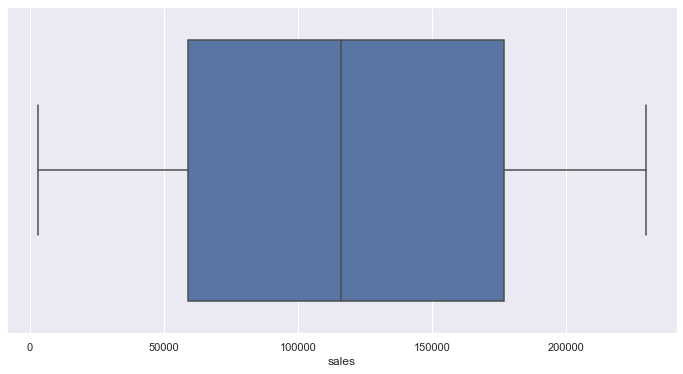

In [16]:
sns.boxplot(data=pet_sales, x='sales')
plt.show()

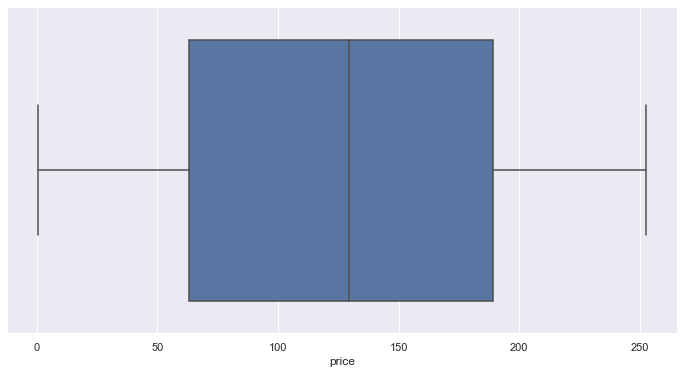

In [17]:
sns.boxplot(data=pet_sales, x='price')
plt.show()

There are no outliers.

## Validation summary

The original data is 879 rows and 9 columns.  

First of all, I checked if the data matches the criteria in the data dictionary: 
* converted Sales column from object to numeric type
* removed rows that indicate other than “cat” ,“dog”, “fish” or “bird” Pet Type. 833 rows left in the df.

Looking at the remaining columns:
* there were 11 Product Categories, as expected
* the Price column is numeric, as expected
* the Rating values range from 1 to 10 point scale, so all are within the range expected
* there were 833 unique Vendors for each product, as expected
* there were 5 Pet Sizes, as expected
* the Rebuy column is binary (1 or 0), as expected.

Then I checked the data frame for: 
* missing values - there were no missing values
* duplicates - no duplicates
* outliers - no outliers.

# Customer Questions

## 1. How many products are being purchased more than once?

In [18]:
# filter df by rebuy variable (1 - purchased more than once; 0 - purchased once)

print('Number of products purchased more than once:', pet_sales.query("re_buy == 1").shape[0])

# 390 products were purchased more than once

Number of products purchased more than once: 390


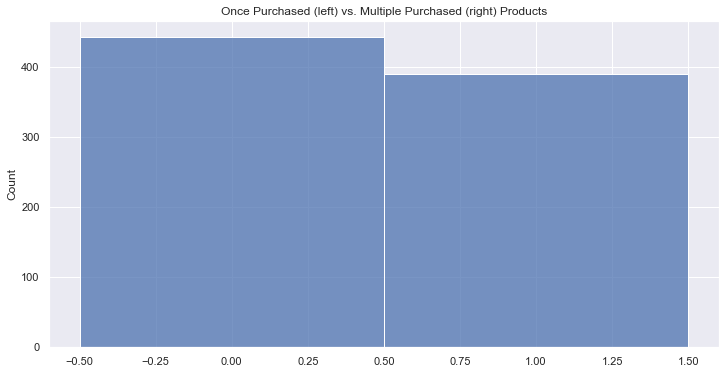

In [105]:
# Visualize with histogram

sns.histplot(data=pet_sales, x='re_buy', discrete=True)
plt.ylabel('Count')
plt.xlabel(None)
plt.title('Once Purchased (left) vs. Multiple Purchased (right) Products')
plt.show()

In [20]:
print('Percent of products purchased more than once:', 
      round(100 * pet_sales.query("re_buy == 1").shape[0] / pet_sales.shape[0], 2), '%')

Percent of products purchased more than once: 46.82 %


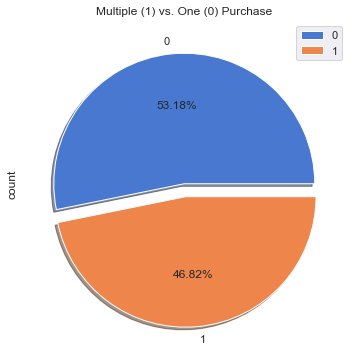

In [21]:
# Visualize with pie plot

# define Seaborn color palette to use
palette_color = sns.color_palette('muted')

pet_sales.value_counts('re_buy').reset_index().rename(columns={0:'count'})\
                                .plot.pie(y='count', explode=[0,0.1],autopct='%1.2f%%',shadow=True, colors=palette_color)
plt.title('Multiple (1) vs. One (0) Purchase')
plt.show()

In [22]:
# Summarize table 

pd.concat([pet_sales.re_buy.value_counts(), 
          pet_sales.re_buy.value_counts(normalize=True).mul(100).round(2)],
          axis=1,
          keys=('count', 'percent'))

,count,percent
0,443,53.18
1,390,46.82


**How many products are being purchased more than once?**
    
There are ***390*** (***46.82 %***) products that were purchased more than once and 443 (53.18 %) products purchased once. So, more products were purchased only once.

# Do the products being purchased again have better sales than others?

In [107]:
# Total amount of sales for multiple-purchased and once-purchased products

sales_by_purchase = pet_sales.groupby('re_buy', as_index=False).agg({'sales':'sum'})

# add ratio of sales by purchase to total sales
sales_by_purchase['ratio'] = round(100 * sales_by_purchase.sales / pet_sales.sales.sum(), 2)

# average sales per product
sales_by_purchase['avg_sales_per_item'] = round(sales_by_purchase.sales / pet_sales.re_buy.value_counts(), 2)

sales_by_purchase

# Average sales per item is higher for multiple purchased products, which makes sense

,re_buy,sales,ratio,avg_sales_per_item
0,0,51125000,52.86,115406.32
1,1,45587000,47.14,116889.74


In [64]:
# pet_sales.groupby('re_buy').agg({'sales':'mean'})

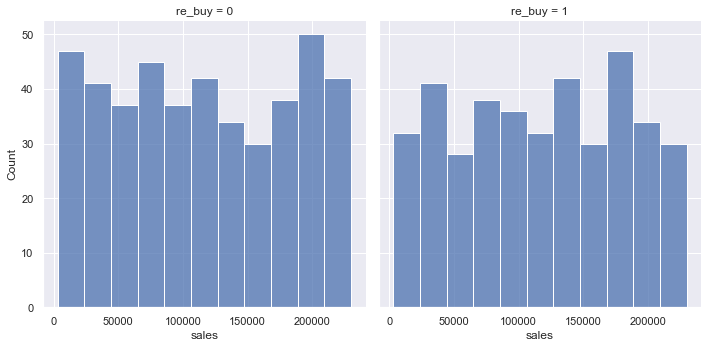

In [103]:
# Visualize with sales distribution by purchases

ax = sns.displot(data=pet_sales, x='sales', col='re_buy')
plt.show()
# There is no visible difference

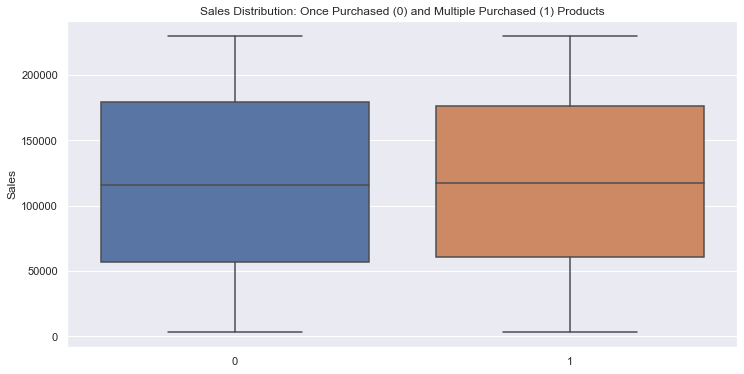

In [101]:
sns.boxplot(data=pet_sales, x='re_buy', y='sales')

plt.ylabel('Sales')
plt.xlabel(None)
plt.title('Sales Distribution: Once Purchased (0) and Multiple Purchased (1) Products')
plt.show()
# The confidence intervals for sales of once purchased products and multiple purchased products are almost equal

### Comparing average sales for multiple purchased products and once purchased products with Student's t-test

* **H0** - there is no difference between multiple purchased products sales and once purchased products sales  
* **Ha** - there is difference between multiple purchased products sales and once purchased products sales

Let's take alpha == 0.05.

In [27]:
# Parametric t-test
stats.ttest_ind(pet_sales[pet_sales['re_buy']==0].sales, 
                pet_sales[pet_sales['re_buy']==1].sales, 
                equal_var=False,
                alternative='two-sided')

# p-values >>> 0.05

Ttest_indResult(statistic=-0.3228621637026388, pvalue=0.7468814018924619)

p-value equals 0.75, so we can't accept Ha. We can state that there is no significant difference between average sales of multiple purchased products and once purchased products.

### Comparing sales for multiple purchased products and once purchased products with Mann-Whitney test

* **H0** - there is no difference between multiple purchased products sales and once purchased products sales  
* **Ha** - there is difference between multiple purchased products sales and once purchased products sales

Let's take alpha == 0.05.

In [28]:
# Non-parametric test
stats.mannwhitneyu(pet_sales[pet_sales['re_buy']==0].sales, 
                   pet_sales[pet_sales['re_buy']==1].sales, 
                   alternative='two-sided')

# p-values >>> 0.05

MannwhitneyuResult(statistic=85324.5, pvalue=0.7596770711171248)

Again, p-value is much bigger than alpha, so we can't accept Ha. We can state that there is no significant difference between sales of multiple purchased products and once purchased products.

**Do the products being purchased again have better sales than others?**

We can't say that products being purchased again have better sales than others. Others sales equal 51 125 000 (52.86% of total sales) dollars, while multiple purchased products sales equal to 45 587 000 (47.14% of total sales). Though, average sales per item is higher for multiple purchased products, which makes sense.  
Statistical t-test and mann-whitney test supports this conclusion (there is no significant difference between sales in these two groups) with significance level of 5%.

## What products are more likely to be purchased again for different types of pets?

In [150]:
# Multiple purchased products by pet type

repurchased_by_pet = pet_sales.groupby(['pet_type', 'product_category'])\
                                .agg({'re_buy':'sum','product_id':'count'}).rename(columns={'product_id':'total_buys'})\
                                .sort_values('re_buy',ascending=False).reset_index()

# percent of re_buys from total buys by each pet type and product category
repurchased_by_pet['prcnt_rebuys'] = round(100 * repurchased_by_pet.re_buy / repurchased_by_pet.total_buys, 2)

repurchased_by_pet.sort_values(['pet_type','prcnt_rebuys'],ascending=[True,False])

,pet_type,product_category,re_buy,total_buys,prcnt_rebuys
29,bird,Bedding,1,2,50.00
31,bird,Clothes,1,2,50.00
34,bird,Accessory,1,2,50.00
36,bird,Housing,1,2,50.00
37,bird,Medicine,1,2,50.00
38,bird,Supplements,1,2,50.00
25,bird,Toys,7,17,41.18
26,bird,Snack,7,17,41.18
27,bird,Equipment,7,18,38.89
35,bird,Food,1,3,33.33


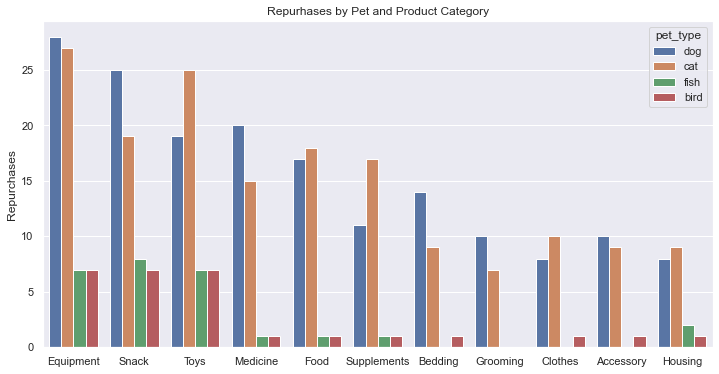

In [110]:
# Visualize repurchased products by pet_type

sns.barplot(data=repurchased_by_pet, x='product_category', y='re_buy', hue='pet_type')

plt.ylabel('Repurchases')
plt.xlabel(None)
plt.title('Repurhases by Pet and Product Category')
plt.show()

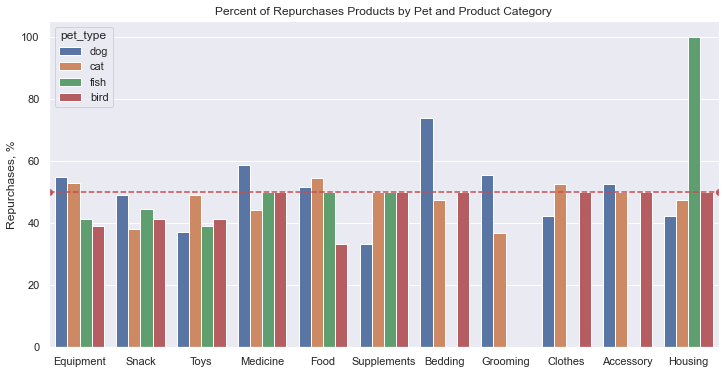

In [140]:
# Visualize repurchased products by pet_type

ax = sns.barplot(data=repurchased_by_pet, x='product_category', y='prcnt_rebuys', hue='pet_type')

ax.axhline(50, color="r", marker='o', ls='--')
plt.ylabel('Repurchases, %')
plt.xlabel(None)
plt.title('Percent of Repurchases Products by Pet and Product Category')
plt.show()

In [178]:
# Let's see on most popular repurchased product categories for each pet type by total sales
total_sales_category = pet_sales.query("re_buy==1").groupby(['pet_type','product_category'], as_index=False)\
                     .agg({'sales':'sum'})\
                     .rename(columns={'sales':'total_sales'})\
                     .sort_values(['pet_type','total_sales'], ascending=[True,False])\
                     .groupby('pet_type').head()

total_sales_category

,pet_type,product_category,total_sales
7,bird,Snack,1019000
3,bird,Equipment,952000
9,bird,Toys,539000
0,bird,Accessory,221000
2,bird,Clothes,196000
13,cat,Equipment,3485000
14,cat,Food,2451000
20,cat,Toys,2403000
18,cat,Snack,1778000
17,cat,Medicine,1758000


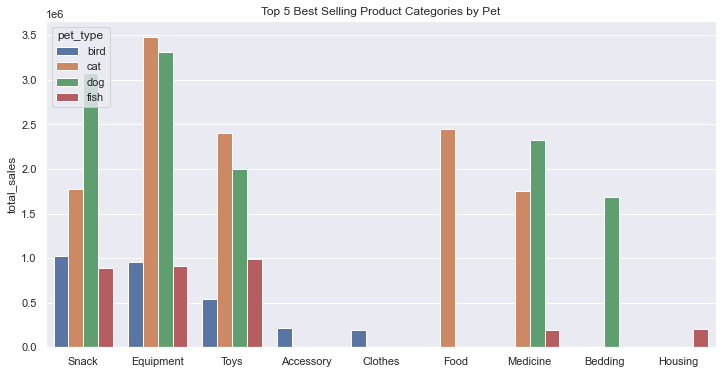

In [179]:
# Most popular repurchased product categories by total sales for each pet type 

sns.barplot(data=total_sales_category, x='product_category', y='total_sales', hue='pet_type', ci=None)

plt.xlabel(None)
plt.title('Top 5 Best Selling Product Categories by Pet')
plt.show()

# Best selling categories for dogs and cats are equipment, snacks, toys, medicine and food
# Best selling categories for birds and fishes are equipment, snacks and toys

**What products are more likely to be purchased again for different types of pets?**

Most likely to be purchased again (we assume > 50% of total purchases) products for:
* Dogs - equipment (54.9% of repurchased items), medicine (58.82%), bedding (73.68%), grooming (55.56%), accessory (52.63%), food (51.52%) and snack (49.02%).
* Cats - food (54.55%), equipment (52.94%), clothes (52.63%), supplements (50%), accessory (50%) and toys (49.02%).
* Fish - housing (100%), supplements (50%), medicine (50%), food (50%), snack (44%).
* Bird - bedding (100%), clothes (50%), accessory (50%), housing (50%), medicine (44%) and supplements (50%).

But some of these most repurchased products don't bring the company enough revenue (see top 5 best selling categories graph), so I recommend to exclude: grooming, accessory, supplements and housing.

Globally, I suggest the marketing team to focus on top-3 product categories for the pet box subscription: **equipment**, **snack** and **toys**. But also keep in mind bedding and medicine for dogs and food and medicine for cats, since these categories are very "repurchaseable" and they're in top-5 by sales.

# Bonus
Let's check the most popular repurchased products for each pet type by total sales.

In [193]:
total_sales_products = pet_sales.query("re_buy==1")\
                                .groupby(['pet_type','product_category','product_id'],as_index=False)\
                                .agg({'sales':'sum'}).rename(columns={'sales':'total_sales'})\
                                .sort_values(['pet_type','total_sales'],ascending=[True,False])\
                                .groupby('pet_type').head(5).reset_index()
total_sales_products

,index,pet_type,product_category,product_id,total_sales
0,0,bird,Accessory,4296,221000
1,8,bird,Equipment,5043,214000
2,17,bird,Snack,5035,198000
3,2,bird,Clothes,4212,196000
4,23,bird,Toys,5021,196000
5,114,cat,Housing,4599,230000
6,99,cat,Food,4749,229000
7,89,cat,Food,4583,228000
8,72,cat,Equipment,4803,226000
9,49,cat,Clothes,4443,225000


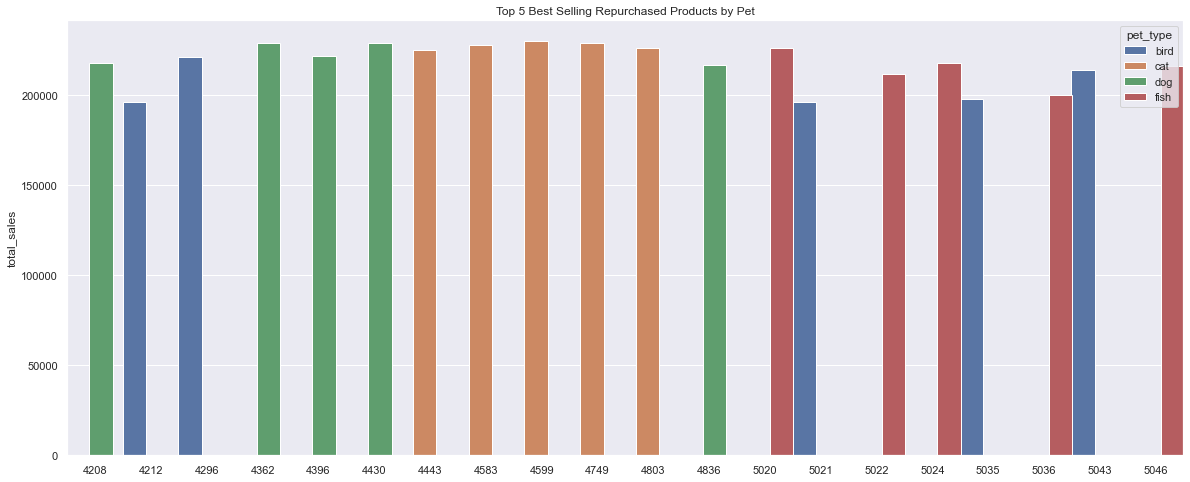

In [206]:
# Most popular repurchased products by total sales for each pet type 

fig,ax = plt.subplots()
sns.barplot(data=total_sales_products, x='product_id', y='total_sales', hue='pet_type', ci=None, ax=ax)

plt.rcParams["figure.figsize"] = (20,8)
plt.xlabel(None)
plt.title('Top 5 Best Selling Repurchased Products by Pet')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .42)
plt.show()

The marketing team could also consider an option to make a special pet box subscription for each pet type with 5 most popular repurchased products.  
For:
* Dogs - products 4208, 4362, 4396, 4430 and 4836;
* Cats - products 4443, 4583, 4599, 4749 and 4803;
* Birds - products 4212, 4296, 5021, 5035 and 5043;
* Fishes - products 5020, 5022, 5024, 5036 and 5046.

# Conclusion

## How many products are being purchased more than once?
There are **390** (**46.82 %**) products that were purchased more than once and **443** (**53.18 %**) products purchased once. So, more products were purchased only once.

## Do the products being purchased again have better sales than others?
We can't say that total sales of products being purchased again have better sales than others. Others sales equal **51 125 000** (**52.86%** of total sales) dollars, while multiple purchased products sales equal to **45 587 000** (**47.14%** of total sales). Though, **average sales per item is higher for multiple purchased products**, which makes sense.
Statistical t-test and mann-whitney test supports this conclusion (there is no significant difference between sales in these two groups) with **significance level of 5%**.

## What products are more likely to be purchased again for different types of pets?
Top-3 most popular repurchased product categories are: **equipment**, **snack** and **toys**. So, I recommend the marketing team to focus on these product categories for the pet box subscription. But also keep in mind bedding and medicine for dogs and food and medicine for cats, since these categories are very "repurchaseable" and they're in top-5 by sales.

The marketing team could also consider an option to make a special pet box subscription for each pet type with top-5 most popular repurchased products.
For:
* Dogs - products 4208, 4362, 4396, 4430 and 4836;
* Cats - products 4443, 4583, 4599, 4749 and 4803;
* Birds - products 4212, 4296, 5021, 5035 and 5043;
* Fishes - products 5020, 5022, 5024, 5036 and 5046.

Also, I suggest to perform further analysis of customer behavior to make special offers for different user segments.

Fin.